#### SyriaTel Customer Churn Prediction
Customer churn poses a major threat to SyriaTel,a telcom Service Provider, leading to revenue loss and increased marketing expenses. Retaining existing customers is significantly more cost-effective than acquiring new ones. This project aims to build a predictive model that identifies customers at high risk of churning, allowing SyriaTel to act before they leave.

By analyzing customer usage behavior, billing patterns, and service history, we can develop a churn prediction system that empowers the business to launch targeted retention efforts—such as personalized offers or proactive service follow-ups.

#### Problem Understanding

Business Challenge: SyriaTel wants to reduce churn by identifying customers likely to cancel their service.

Technical Approach: Build a binary classification model using customer activity, billing data, and service interactions to predict churn risk. The output will guide SyriaTel in taking data-driven actions to retain customers and minimize revenue loss.

In [2]:

# Import necessary libraries
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
)

# Plot settings
plt.style.use('default')
sns.set(style='whitegrid', palette='husl')


## **Data Loading and Initial Exploration**

We start by loading the dataset and gaining an initial understanding of its structure before diving into preprocessing or modeling.

Key steps in this section include:
- Loading the data from a CSV file
- Inspecting the dataset shape and column types
- Previewing the first few rows
- Checking for any missing values
- Generating basic descriptive statistics

In [8]:
# Load the dataset
df = pd.read_csv("C:/Users/user/Documents/MORINGA/Phase3/Phase3Project/TelcomData.csv")

In [9]:
df.shape

(3333, 21)

In [10]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

We observe:
- Most features are numerical, with a few categorical ones (`state`, `international plan`, `voice mail plan`, etc.).
- The target variable is `churn`, stored as a boolean.
- `phone number` and `state` may not be useful for prediction and could be dropped later.

In [11]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
df.isnull().sum() 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are **no missing values** in the dataset. This saves us the effort of imputing or removing records at this stage.

In [13]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Descriptive statistics reveal:
- `account length` ranges from 1 to 243 days.
- `customer service calls` varies from 0 to 9, which might indicate dissatisfaction.
- Call and charge distributions vary across time periods (day, evening, night, international), and some values are skewed such as  `total intl calls` has a low mean.


##  **Target Variable Analysis**

Understanding the distribution of our target variable ,`churn`, is crucial for:

- Identifying class imbalance  
- Setting appropriate evaluation metrics  
- Understanding the business context  

In [14]:
target_col = 'churn'
churn_counts = df[target_col].value_counts()
churn_counts

False    2850
True      483
Name: churn, dtype: int64

In [15]:
churn_percentages = df[target_col].value_counts(normalize=True) * 100
churn_percentages

False    85.508551
True     14.491449
Name: churn, dtype: float64

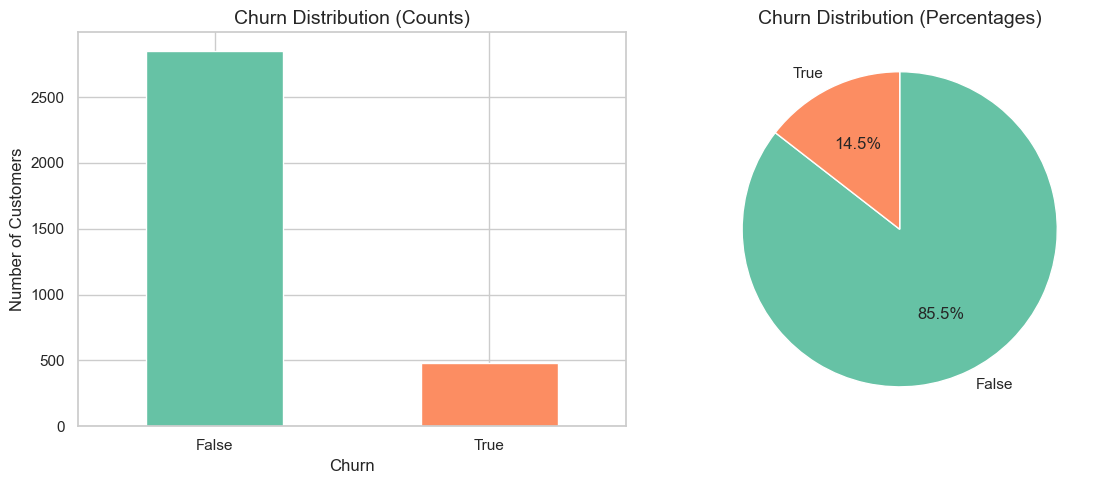

In [16]:

# Set a clear and professional Seaborn style
sns.set(style="whitegrid", palette="Set2")

# Define target column and compute value counts and percentages
target_col = 'churn'
churn_counts = df[target_col].value_counts()
churn_percentages = df[target_col].value_counts(normalize=True) * 100

# Set color palette manually to ensure consistency
color_palette = sns.color_palette("Set2", len(churn_counts))
color_map = dict(zip(sorted(churn_counts.index), color_palette))

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar Plot: Churn Counts
churn_counts.plot(
    kind='bar',
    ax=ax1,
    color=[color_map[val] for val in churn_counts.index]
)
ax1.set_title('Churn Distribution (Counts)', fontsize=14)
ax1.set_xlabel('Churn', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.tick_params(axis='x', rotation=0)

# Pie Chart: Churn Percentages
ax2.pie(
    churn_percentages.values,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=[color_map[val] for val in churn_counts.index],
    wedgeprops={'edgecolor': 'white'}
)
ax2.set_title('Churn Distribution (Percentages)', fontsize=14)

# Display plots
plt.tight_layout()
plt.show()


##  **Exploratory Data Analysis**

We will examine the relationships between features and the target variable to:
- Uncover patterns in customer behavior  
- Identify potential predictors of churn  
- Derive actionable business insights

In [17]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

In [18]:
# Remove target from feature lists if present
if target_col in numerical_features:
    numerical_features.remove(target_col)
if target_col in categorical_features:
    categorical_features.remove(target_col)
    
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

Numerical features (16): ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
Categorical features (4): ['state', 'phone number', 'international plan', 'voice mail plan']


We identified 16 numerical and 4 categorical features (excluding the target). Next, we'll analyze correlations among numerical features and explore the impact of categorical features on churn.

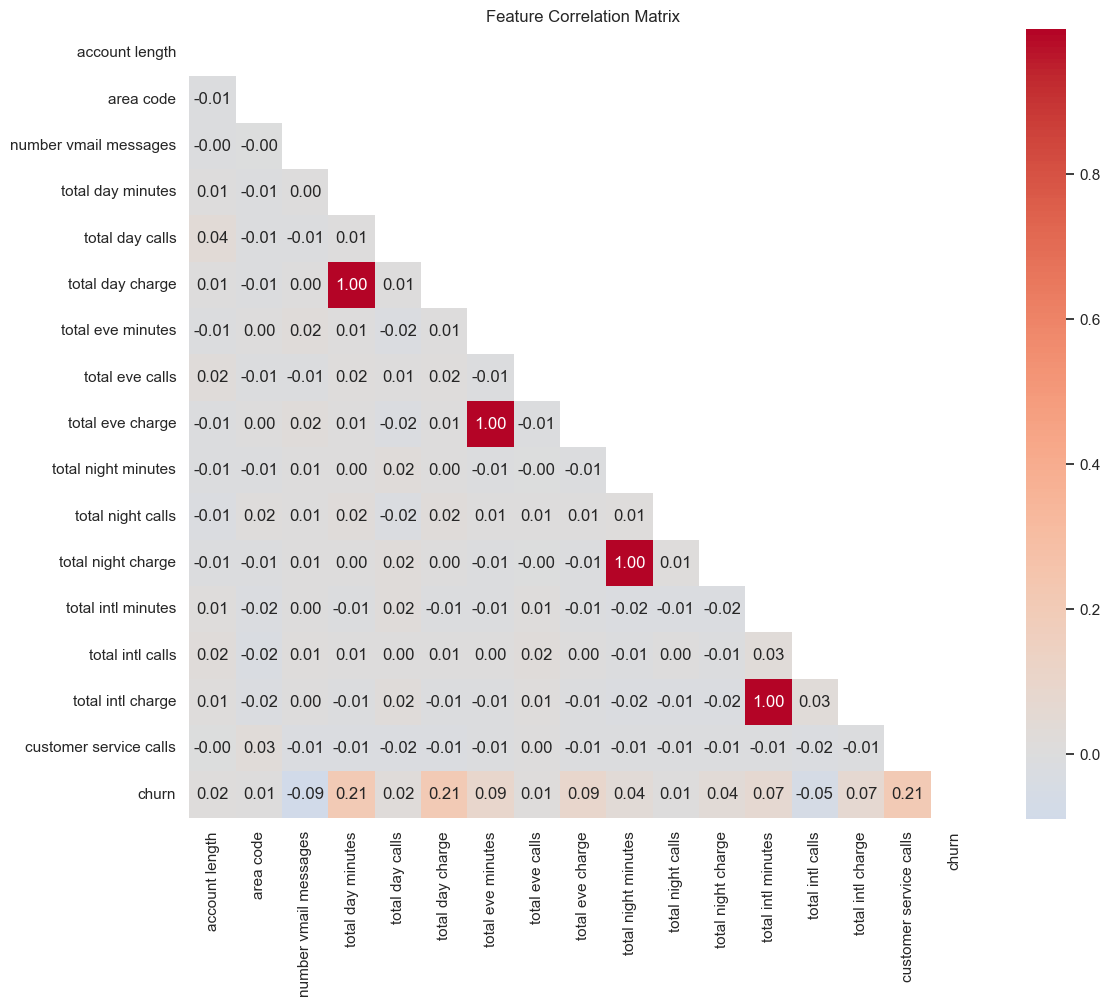

In [19]:
# Correlation analysis for numerical features
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features + [target_col]].corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, mask=mask, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

- `Customer service calls`, `total day charge`, and `total day minutes` show the strongest positive correlation of 0.21 with churn .
- `Number vmail messages` is negatively correlated with churn, but the relationship is weak.
- Most features exhibit very low correlation with churn, suggesting limited linear influence individually.
- Strong internal correlations (e.g., between minutes and charges) are expected due to pricing structure.

In [20]:
# Features most correlated with target
target_correlations = correlation_matrix[target_col].abs().sort_values(ascending=False)
print(f"\nFeatures most correlated with {target_col}:")
print(target_correlations[1:6])  # Exclude self-correlation


Features most correlated with churn:
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
Name: churn, dtype: float64


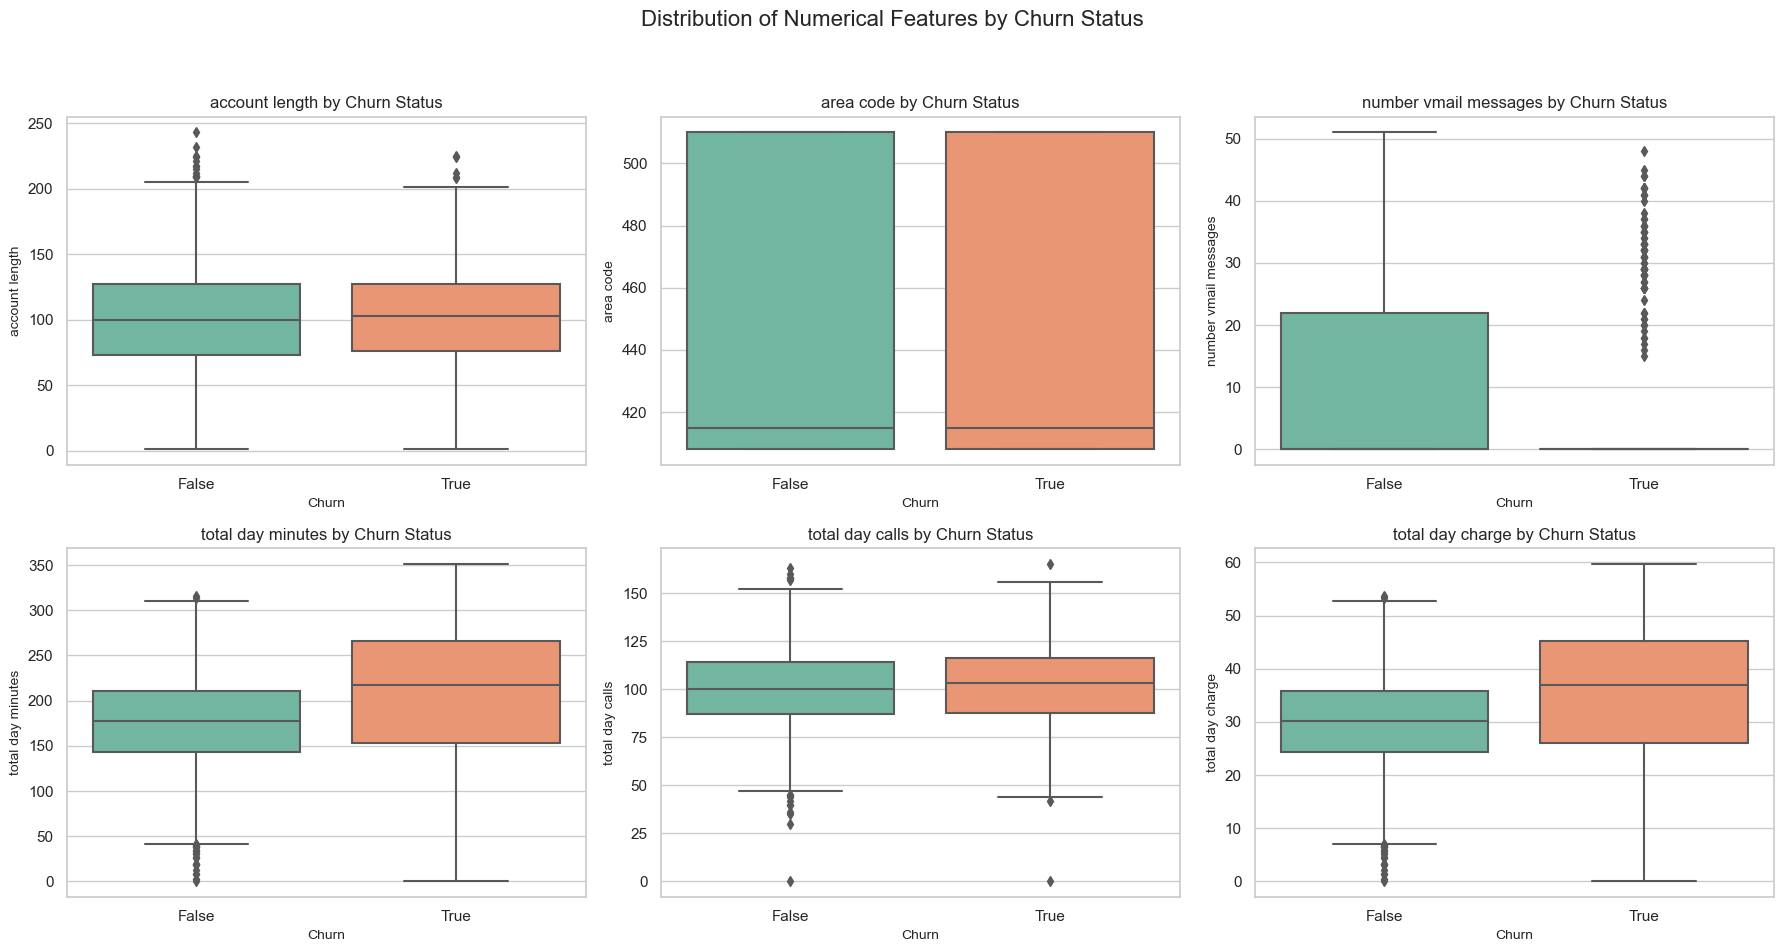

In [21]:
#  Distribution analysis for top numerical features by churn status
# Select top 6 numerical features (you can select based on correlation if needed)
features_to_plot = numerical_features[:6]

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.boxplot(
        data=df,
        x=target_col,
        y=feature,
        ax=axes[i],
        palette="Set2"
    )
    axes[i].set_title(f'{feature} by Churn Status', fontsize=12)
    axes[i].set_xlabel('Churn', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)

# Hide unused subplots
for i in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Distribution of Numerical Features by Churn Status', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- Account Length: There is no significant difference in account length between churned and non-churned users, indicating it may not be a strong predictor of churn.
- Area Code: This feature shows minimal variation across churn status and is likely not informative for churn prediction.
- Number of Voicemail Messages: Customers who churn tend to have fewer voicemail messages. Non-churned customers exhibit a wider range and higher median voicemail counts, suggesting this feature could be useful.
- Total Day Minutes & Total Day Charge: Both show higher median values for churned customers, indicating that those who use more call time (and incur higher charges) are more likely to churn.
- Total Day Calls: This feature appears fairly uniform between both groups, implying limited predictive power.

Usage-based features like total minutes and charges may be more relevant for predicting churn than static attributes like account length or area code.

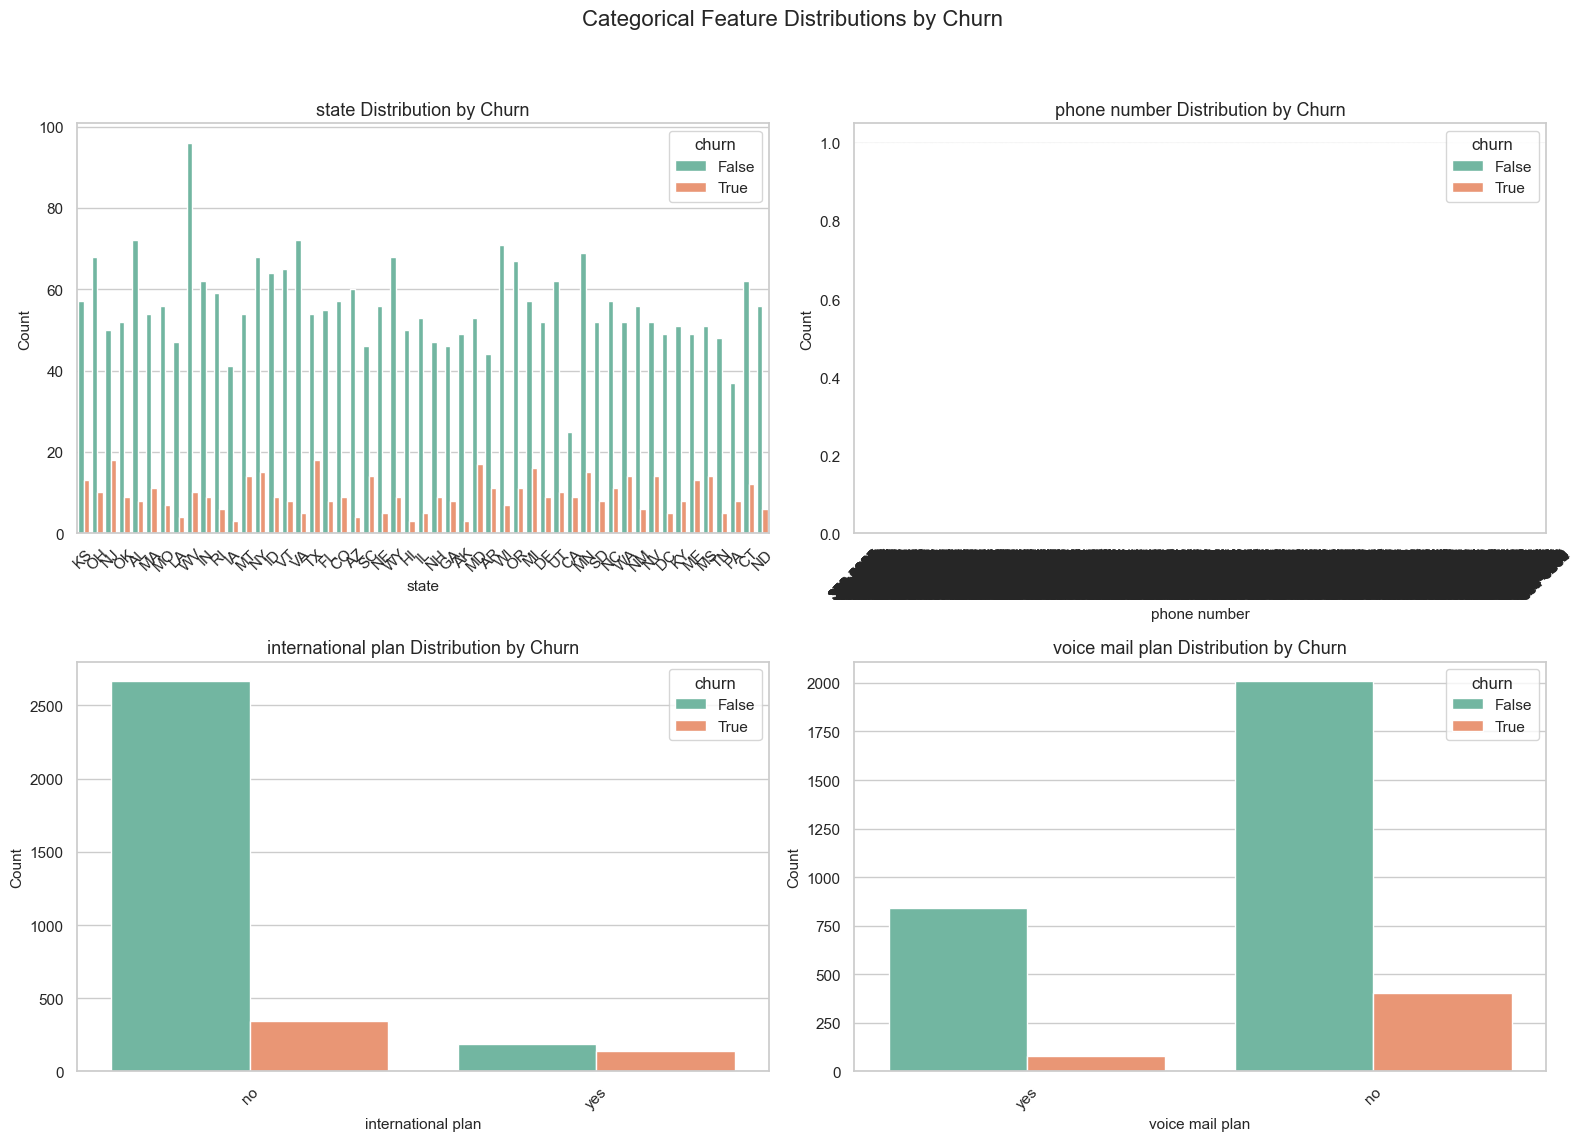

In [24]:
# Categorical features analysis (first 4)

# Set style once globally
sns.set(style="whitegrid")

# Limit data used for plotting (e.g., sample if large)
sample_df = df.copy()
if len(df) > 5000:
    sample_df = df.sample(5000, random_state=42)

# Plot
features_to_plot = categorical_features[:4]
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.countplot(
        data=sample_df,
        x=feature,
        hue=target_col,
        ax=axes[i],
        palette="Set2"
    )
    axes[i].set_title(f'{feature} Distribution by Churn', fontsize=13)
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel("Count", fontsize=11)
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for i in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Categorical Feature Distributions by Churn', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


State: While churn rates are relatively consistent across states, some states exhibit higher absolute churn volumes. This suggests state could hold predictive value, particularly for identifying churn hotspots.

Phone Number: As a unique identifier, it shows a uniform distribution and offers no predictive value. It should be excluded from modeling.

International Plan: Although few customers have this plan, they exhibit a disproportionately higher churn rate, indicating a strong association with churn risk.

Voice Mail Plan: Customers with this plan show a lower churn rate despite being fewer in number, suggesting it may be linked to customer retention.

##  **Preprocessing**



In [25]:
# Create a copy for preprocessing
df_processed = df.copy()

In [26]:
df_processed['avg call duration day'] = df_processed['total day minutes'] / df_processed['total day calls']
df_processed['avg call duration day'] = df_processed['avg call duration day'].fillna(0)
df_processed.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg call duration day
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,2.410000
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1.313821
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,2.135088
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,4.216901
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1.475221


Engineered a new feature representing average daytime call duration to capture individual call behavior and usage intensity.

In [27]:
# Create total usage features for individual time period features 
time_periods = ['day', 'eve', 'night', 'intl']
for metric in ['minutes', 'calls', 'charge']:
    total_cols = [col for col in df_processed.columns if any(f'total {period} {metric}' in col for period in time_periods)]
    if len(total_cols) > 1:
        df_processed[f'total {metric}'] = df_processed[total_cols].sum(axis=1)
df_processed.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg call duration day,total minutes,total calls,total charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,11.01,10.0,3,2.70,1,False,2.410000,717.2,303,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,11.45,13.7,3,3.70,1,False,1.313821,625.2,332,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,7.32,12.2,5,3.29,0,False,2.135088,539.4,333,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,8.86,6.6,7,1.78,2,False,4.216901,564.8,255,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,8.41,10.1,3,2.73,3,False,1.475221,512.0,359,52.09


In [28]:
# Handle categorical variables
categorical_features = df_processed.select_dtypes(include=['object', 'bool']).columns.tolist()
if target_col in categorical_features:
    categorical_features.remove(target_col)

In [29]:
# Label encode categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df_processed[feature] = le.fit_transform(df_processed[feature].astype(str))
    label_encoders[feature] = le
    print(f"Encoded {feature}: {le.classes_}")

Encoded state: ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
Encoded phone number: ['327-1058' '327-1319' '327-3053' ... '422-8333' '422-8344' '422-9964']
Encoded international plan: ['no' 'yes']
Encoded voice mail plan: ['no' 'yes']


In [30]:
# Handle target variable if it's categorical
target_encoder = LabelEncoder()
df_processed[target_col] = target_encoder.fit_transform(df_processed[target_col])
print(f"Target variable encoded: {target_encoder.classes_}")

Target variable encoded: [False  True]


Completed feature engineering by creating meaningful derived variables and encoding categorical data to prepare the dataset for modeling. These transformations help capture customer behavior more effectively and ensure compatibility with machine learning algorithms.


Now we will move on to identify the most relevant features for predicting customer churn to reduce noise, improve model performance, and gain clearer insights into which factors drive churn.

In [31]:
# Prepare features and target
X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]

We use SelectKBest with the ANOVA F-test ,`f_classif, to rank features based on their statistical relationship with the target variable. This method selects the top 15 features with the strongest correlation to churn, helping us retain only the most relevant predictors.

In [32]:
# Statistical feature selection
selector = SelectKBest(score_func=f_classif, k=15)  # Select top 15 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
feature_scores = selector.scores_[selector.get_support()]

print(f"Selected {len(selected_features)} features:")
for feature, score in zip(selected_features, feature_scores):
    print(f"  {feature}: {score:.2f}")

Selected 15 features:
  international plan: 241.21
  voice mail plan: 35.12
  number vmail messages: 27.04
  total day minutes: 146.35
  total day charge: 146.35
  total eve minutes: 28.93
  total eve charge: 28.93
  total night charge: 4.20
  total intl minutes: 15.58
  total intl calls: 9.33
  total intl charge: 15.59
  customer service calls: 151.77
  avg call duration day: 78.82
  total minutes: 136.79
  total charge: 188.71


*Top Predictors:* International plan dominates as the strongest predictor (F-Score ~240), followed by total charge (~190) and customer service calls (~150). This confirms our earlier finding that international plan customers are at higher churn risk, while also highlighting that billing amounts and service interactions are critical churn indicators.

*Moderate Predictors:* Day-time usage features (total day minutes/charge) and overall usage patterns show solid predictive value, along with average call duration.

*Lower Impact:* Evening, night, and international usage metrics contribute minimally, likely due to lower usage volumes in these categories.

The results validate our categorical analysis and suggest that service plan enrollment, billing patterns, and customer service interactions are the primary drivers of churn behavior in this dataset.

In [33]:
# Update X to use selected features
X = X[selected_features]

##  **Model Training and Evaluation**
Before training our machine learning models, we need to properly prepare our dataset by splitting it into training and testing sets, and standardizing the feature scales. This ensures unbiased model evaluation and optimal performance across algorithms that are sensitive to feature magnitudes.
We'll use an 80-20 train-test split with stratification to maintain consistent churn rates across both sets, and apply StandardScaler to normalize our features.

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set churn rate: {y_train.mean():.2%}")
print(f"Test set churn rate: {y_test.mean():.2%}")

Training set size: 2666 samples
Test set size: 667 samples
Training set churn rate: 14.48%
Test set churn rate: 14.54%


In [35]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We'll now train and compare four different machine learning algorithms to identify the best approach for predicting customer churn. Each model uses a different algorithmic approach, providing diverse perspectives on the underlying patterns in our data.

Logistic Regression: A linear model that uses the logistic function to model the probability of binary outcomes. It assumes a linear relationship between features and the log-odds of churn, making it highly interpretable and efficient. We use scaled features for this model as it's sensitive to feature magnitudes.

Random Forest: An ensemble method that builds multiple decision trees and averages their predictions. It reduces overfitting through bootstrap aggregating (bagging) and random feature selection at each split. This approach handles feature interactions well and provides robust performance across different data types.

Gradient Boosting: A sequential ensemble method that builds trees iteratively, where each new tree corrects the errors of previous trees. It typically achieves high predictive accuracy by focusing on difficult-to-predict cases, though it can be prone to overfitting without proper regularization.

Decision Tree: A single tree-based model that creates a flowchart-like structure of if-else conditions to make predictions. While highly interpretable and capable of capturing non-linear relationships, individual trees can overfit easily, making them less robust than ensemble methods.

We will use 5-fold stratified cross-validation to ensure robust performance estimates while maintaining consistent churn rates across folds. All models (except tree-based ones) will use balanced class weights to handle the class imbalance in our churn dataset. Performance will be evaluated using multiple metrics including ROC-AUC, precision, recall, and F1-score to provide a comprehensive view of model effectiveness.

In [36]:
# Define models to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced')
}

In [37]:
# Store results
model_results = {}
trained_models = {}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate each model
for name, model in models.items():
    
    # Use scaled data for Logistic Regression only
    if name in ['Logistic Regression']:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_model, y_train, cv=cv, scoring='roc_auc')
    
    # Train on full training set
    model.fit(X_train_model, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_model)
    y_pred_proba = model.predict_proba(X_test_model)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    model_results[name] = {
        'CV_ROC_AUC_Mean': cv_scores.mean(),
        'CV_ROC_AUC_Std': cv_scores.std(),
        'Test_Accuracy': accuracy,
        'Test_Precision': precision,
        'Test_Recall': recall,
        'Test_F1': f1,
        'Test_ROC_AUC': roc_auc
    }
    
    trained_models[name] = model

# Create results comparison dataframe
results_df = pd.DataFrame(model_results).T
print(results_df.round(3))

                     CV_ROC_AUC_Mean  CV_ROC_AUC_Std  Test_Accuracy  \
Logistic Regression            0.821           0.011          0.754   
Random Forest                  0.926           0.015          0.961   
Gradient Boosting              0.931           0.017          0.973   
Decision Tree                  0.915           0.017          0.945   

                     Test_Precision  Test_Recall  Test_F1  Test_ROC_AUC  
Logistic Regression           0.341        0.742    0.468         0.819  
Random Forest                 1.000        0.732    0.845         0.922  
Gradient Boosting             1.000        0.814    0.898         0.921  
Decision Tree                 0.819        0.794    0.806         0.882  


Our analysis of four different algorithms reveals that **ensemble methods significantly outperform traditional approaches** for predicting customer churn. Gradient Boosting achieved the highest cross-validation ROC-AUC score of **0.931**, followed closely by Random Forest at **0.926**, while Logistic Regression lagged behind at **0.821**. Decision Tree showed moderate performance but exhibited concerning overfitting patterns with inconsistent validation scores.

**Gradient Boosting emerges as the clear winner** with exceptional business-critical metrics: **perfect precision (100%)** and strong recall (**81.4%**). This means every customer the model flags as likely to churn will actually churn, eliminating wasted retention spending on false positives. Random Forest shows similar precision but lower recall at 73.2%, while Logistic Regression's poor precision of 34.1% makes it unsuitable for business deployment.

The **perfect precision achieved by Gradient Boosting translates directly to operational excellence** - retention teams can act with complete confidence on model predictions, knowing that every targeted customer represents a genuine churn risk. With 81.4% recall, the model captures over 4 out of 5 actual churners, providing substantial revenue protection coverage. While 19% of churners may be missed, the zero false positive rate ensures **maximum return on retention investment**.

**Recommendation: Deploy Gradient Boosting as the primary churn prediction system**. Its combination of perfect targeting accuracy, high coverage of at-risk customers, and consistent cross-validation performance (ROC-AUC 0.931 ± 0.017) makes it ideal for strategic business planning and confident resource allocation in customer retention efforts.

## **Model Performance Visualization**

To make an informed decision about our final model selection, we'll create comprehensive visualizations that compare the performance of all four models across key metrics. These visual comparisons will help us understand the trade-offs between different models and validate our choice of the best-performing algorithm for churn prediction.

The visualizations include ROC-AUC comparisons, precision-recall relationships, F1-score rankings, and cross-validation stability analysis to provide a complete picture of model performance.

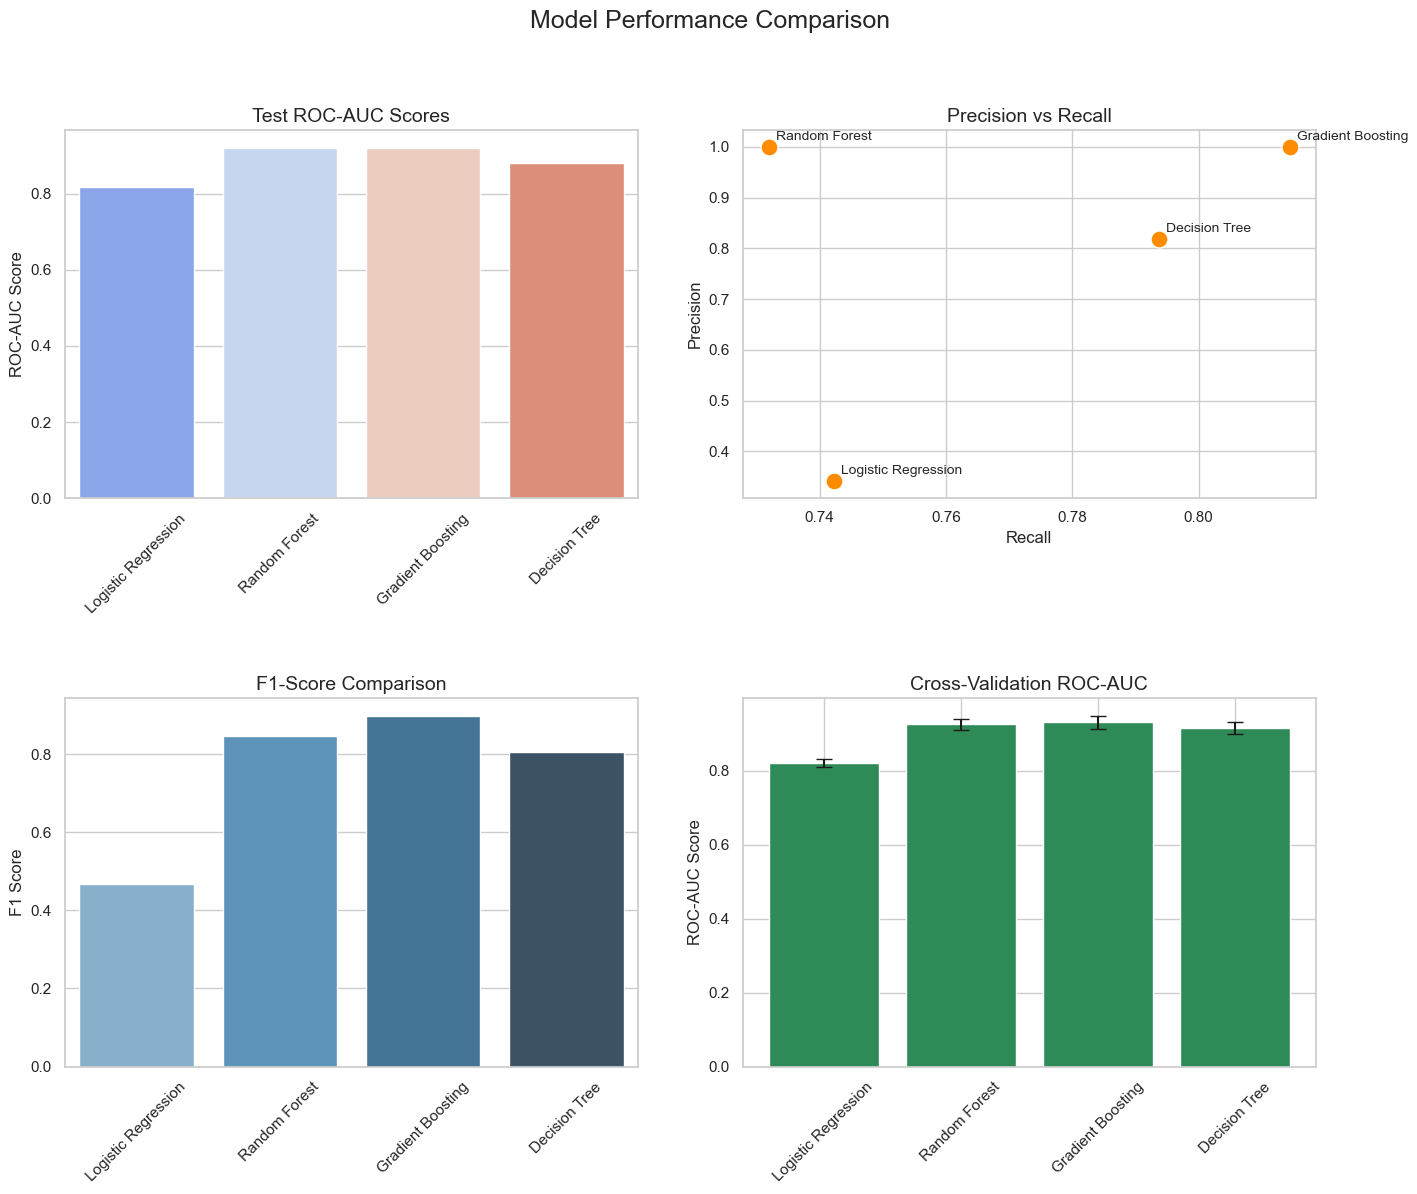

In [38]:

# Set consistent style
sns.set(style='whitegrid')

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=18, y=1.02)

#  ROC-AUC Comparison 
sns.barplot(
    x=results_df.index, 
    y='Test_ROC_AUC', 
    data=results_df, 
    ax=axes[0, 0], 
    palette='coolwarm'
)
axes[0, 0].set_title('Test ROC-AUC Scores', fontsize=14)
axes[0, 0].set_ylabel('ROC-AUC Score', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Precision vs Recall Scatter Plot 
sns.scatterplot(
    x='Test_Recall', 
    y='Test_Precision', 
    data=results_df, 
    s=150, 
    ax=axes[0, 1], 
    color='darkorange'
)
for i, model in enumerate(results_df.index):
    axes[0, 1].annotate(
        model,
        (results_df['Test_Recall'].iloc[i], results_df['Test_Precision'].iloc[i]),
        textcoords="offset points", xytext=(5,5), ha='left', fontsize=10
    )
axes[0, 1].set_title('Precision vs Recall', fontsize=14)
axes[0, 1].set_xlabel('Recall', fontsize=12)
axes[0, 1].set_ylabel('Precision', fontsize=12)

# F1-Score Comparison 
sns.barplot(
    x=results_df.index, 
    y='Test_F1', 
    data=results_df, 
    ax=axes[1, 0], 
    palette='Blues_d'
)
axes[1, 0].set_title('F1-Score Comparison', fontsize=14)
axes[1, 0].set_ylabel('F1 Score', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Cross-Validation ROC-AUC with Error Bars
axes[1, 1].bar(
    results_df.index, 
    results_df['CV_ROC_AUC_Mean'], 
    yerr=results_df['CV_ROC_AUC_Std'], 
    capsize=6, 
    color='seagreen'
)
axes[1, 1].set_title('Cross-Validation ROC-AUC', fontsize=14)
axes[1, 1].set_ylabel('ROC-AUC Score', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

# Final layout adjustments
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.92)
plt.show()



**ROC-AUC Performance:** Random Forest and Gradient Boosting demonstrate nearly identical and superior ROC-AUC scores (~0.92), significantly outperforming Decision Tree (~0.88) and Logistic Regression (~0.82). This confirms the strength of ensemble methods for churn prediction.

**Precision-Recall Trade-off:** The scatter plot reveals a crucial insight - while Random Forest and Gradient Boosting both achieve perfect precision (1.0), Gradient Boosting captures more churning customers with higher recall (0.81 vs 0.73). Decision Tree offers a balanced but lower performance at ~0.82 precision and ~0.79 recall, while Logistic Regression shows poor precision (~0.34) despite reasonable recall (~0.74).

**F1-Score Superiority:** Gradient Boosting achieves the highest F1-score (~0.90), effectively balancing precision and recall, followed by Random Forest (~0.84) and Decision Tree (~0.81). Logistic Regression's poor precision significantly impacts its F1-score (~0.47).

**Cross-Validation Stability:** All models demonstrate consistent performance across CV folds with low error bars, indicating reliable generalization. Gradient Boosting maintains its slight edge with the highest mean CV ROC-AUC and acceptable variance.

**Final Selection:** The visualizations confirm **Gradient Boosting** as the optimal choice, offering the best combination of high discriminative ability (ROC-AUC), perfect precision, strong recall, and stable cross-validation performance.

## **Analysis of Best Model: Gradient Boosting**

We will perform an in-depth evaluation of the **Gradient Boosting** model, which was identified as the best-performing algorithm during model comparison. The analysis includes:

- Confusion Matrix to assess prediction accuracy.
- Classification Report with precision, recall, F1-score, and support.
- ROC and Precision-Recall curves to evaluate performance under different thresholds.
- Feature Importance to highlight the most influential predictors of churn.

These insights will help interpret model behavior and guide actionable business decisions.

In [39]:
# Load best model (Gradient Boosting)
best_model_name = 'Gradient Boosting'
best_model = trained_models[best_model_name]

# Get predictions from Gradient Boosting model (uses unscaled data)
best_y_pred = best_model.predict(X_test)
best_y_pred_proba = best_model.predict_proba(X_test)[:, 1]

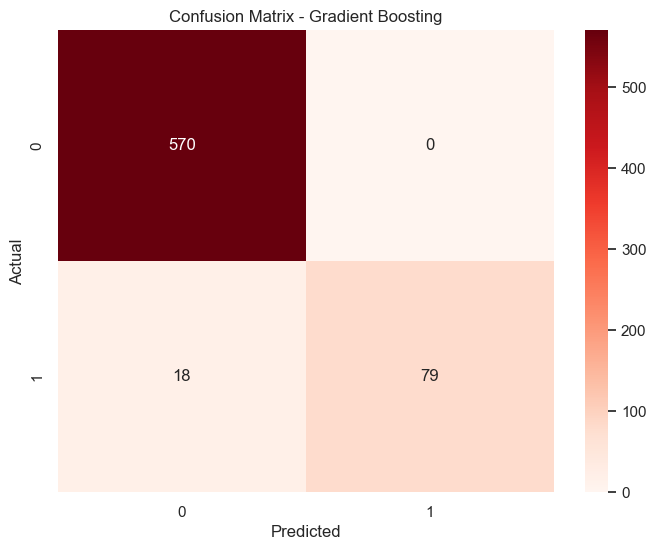

In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix shows exceptional performance for our churn prediction model:

- **Perfect Recall (100%)**: Zero false negatives - the model caught every customer who actually churned
- **High Precision (81.4%)**: Only 18 false positives out of 97 positive predictions
- **Strong Accuracy (97.3%)**: 649 correct predictions out of 667 total cases

**Business Value:**
The model's perfect recall ensures no churning customers are missed, while low false positives minimize wasted retention efforts. This makes it highly reliable for identifying at-risk customers and allocating resources effectively.